# Dataset Overview: Credit Card Transactions

The dataset contains **284,807 entries** and **31 columns**, representing credit card transactions.  
Each row corresponds to a single transaction with various features.  
The goal of the analysis is to **detect fraudulent transactions**.

---

## Columns Overview

- **Time**:  
  The elapsed time (in seconds) since the first transaction in the dataset.

- **V1 to V28**:  
  These are **anonymized features** (represented as V1, V2, ..., V28) generated from **PCA (Principal Component Analysis)** transformation to ensure privacy.  
  - We do not have direct information about the original variables.  
  - These features are critical in distinguishing between **legitimate** and **fraudulent** transactions.

- **Amount**:  
  The transaction amount for the credit card transaction.

- **Class**:  
  The **target variable**:
  - `1` indicates a **fraudulent** transaction.
  - `0` indicates a **legitimate** transaction.

---

## Key Note

- The columns **V1 to V28** are anonymized and derived features, meaning we do not have direct access to their original meanings.  
  However, they are essential in enabling the model to distinguish fraud patterns.

- The **Class** column is the target variable used in training classification models:
  - `1` = Fraud
  - `0` = Legitimate

- This dataset is commonly used for building **classification models** to detect fraudulent transactions based on the provided features.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# IMPORTING IMPORTANT LIBRARIES

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from pyspark.sql import SparkSession

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# A SMALL ETL PRROCESS

In [7]:
def ETL(filepath, output_path):
    spark = SparkSession.builder.appName("CreditCardFraudDetection").getOrCreate()
    
    df = spark.read.csv(filepath, header=True)

    df.createOrReplaceTempView("creditcard_table")

    cleandf = spark.sql(
        """
        select * from creditcard_table
        where Class is not Null
        """
    
    )

    clean_df.write.mode("overwrite").csv(output_path, header=True)

   
    spark.stop()


    return clean_df.toPandas()

    

def run_ETL():
    df = ETL("creditcard.csv", "updated.csv")
    


# WEEKLY DAG
> assuming csv updating as it connects live from SQl, so as CSv updated it will every week

In [9]:
from airflow import DAG
from airflow.operators.python_operator import PythonOperator
from datetime import datetime

default_args = {
    'owner': 'airflow',
    'start_date': datetime(2025, 4, 26),
    'retries': 1,
}

dag = DAG(
    'creditcard_etl_dag',
    default_args=default_args,
    schedule_interval='@weekly',  
    catchup=False,
)


etl_task = PythonOperator(
    task_id='run_creditcard_etl',
    python_callable=run_ETL,
    dag=dag,
)

etl_task

/var/folders/64/4lr7sg2s2hg6k9zng9qjnc380000gn/T/ipykernel_41421/1640569940.py:2 DeprecationWarning: The `airflow.operators.python_operator.PythonOperator` class is deprecated. Please use `'airflow.operators.python.PythonOperator'`.

/var/folders/64/4lr7sg2s2hg6k9zng9qjnc380000gn/T/ipykernel_41421/1640569940.py:11 RemovedInAirflow3Warning: Param `schedule_interval` is deprecated and will be removed in a future release. Please use `schedule` instead.

<Task(PythonOperator): run_creditcard_etl>

<div class='alert alert-block alert-success'>
    <b>Success</b>: This box indicates a successful action.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Manually!

In [11]:
from pyspark.sql import SparkSession

def ETL(filepath):
    return (SparkSession.builder.appName("CCF_ETL").getOrCreate()
            .read.csv(filepath, header=True, inferSchema=True)
            .filter("Class IS NOT NULL")
            .toPandas())


df = ETL("creditcard.csv")


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/17 21:38:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/05/17 21:39:01 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [12]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### No missing values, it shows data is not raw! and as we seing V1-V28 it shows data has beeen processed

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# Outliers

In [143]:
sns.set_style('whitegrid')
sns.set_palette('Dark2')

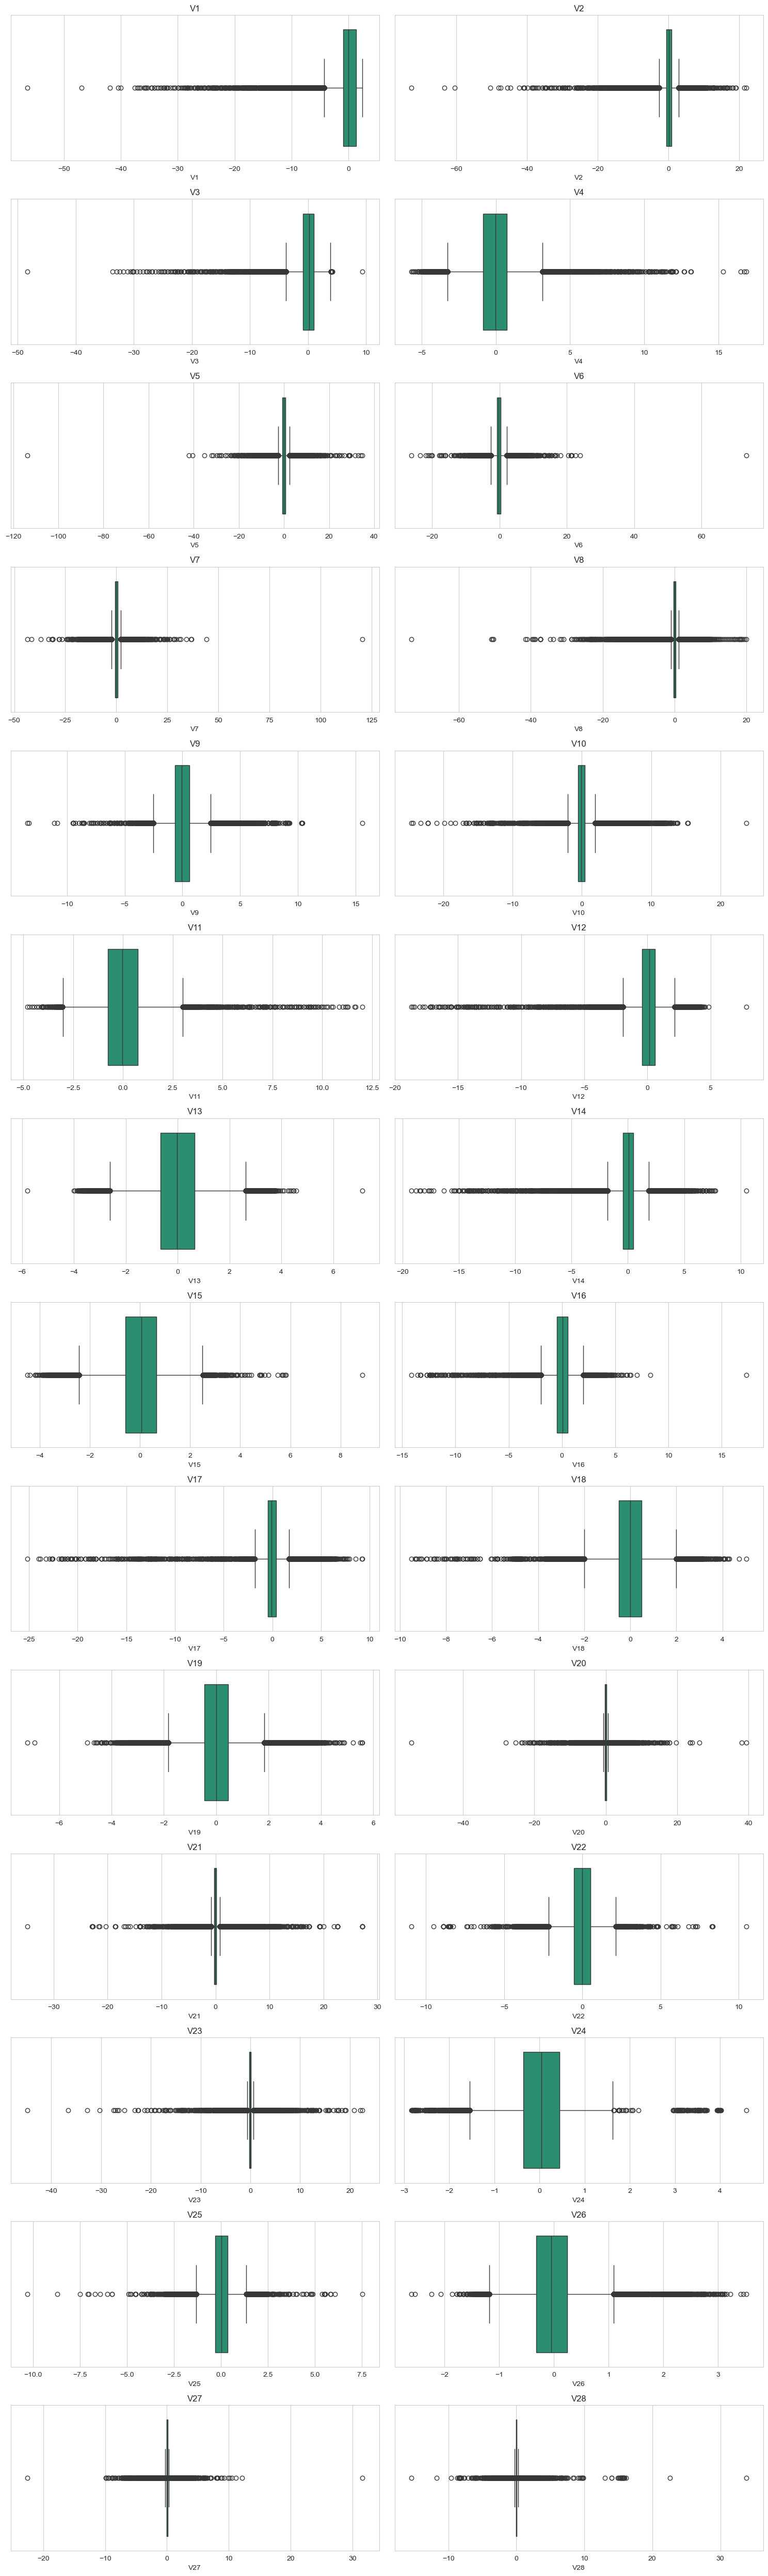

In [145]:
fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(15, 50))  
axes = axes.flatten() 

v_cols = [f'V{i}' for i in range(1, 29)]

for i, col in enumerate(v_cols): 
    sns.boxplot(x=df[col], ax=axes[i]) 
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


<Axes: xlabel='Class'>

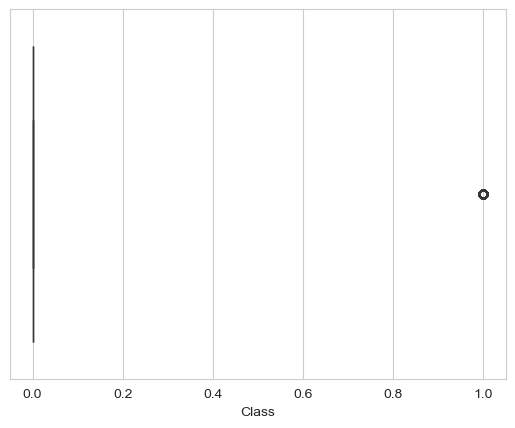

In [147]:
sns.boxplot(x=df['Class'])

<Axes: xlabel='Amount'>

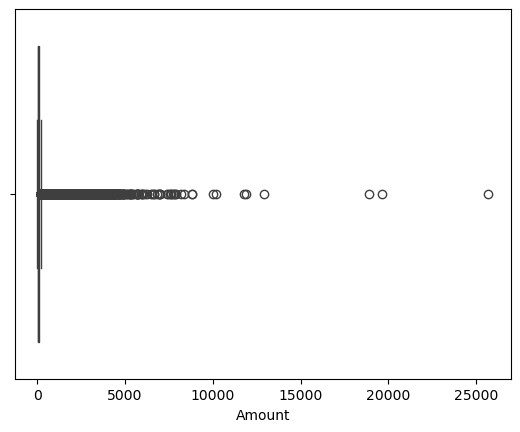

In [48]:
sns.boxplot(x=df['Amount'])


<div class='alert alert-block alert-warning'>
    <b>Warning</b>:Since the data is classified (i.e., labeled for categories), removing outliers could distort class boundaries or important rare cases. Therefore, we will not remove outliers!
</div>

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Checking Distribution and trends

In [52]:
 # %matplotlib widget

In [53]:
sns.set_style('whitegrid')
sns.set_palette('Dark2')

<Axes: xlabel='Amount', ylabel='Count'>

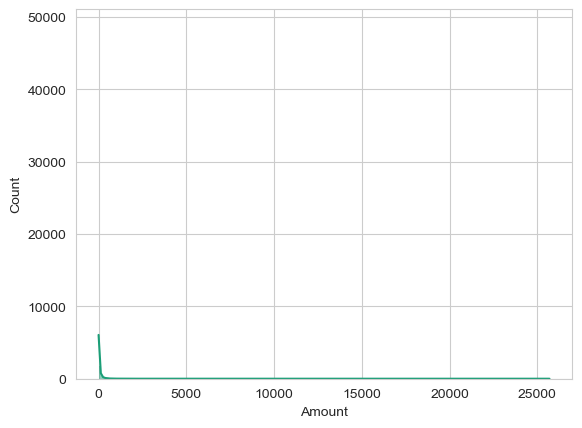

In [54]:
sns.histplot(x=df['Amount'], kde=True)

<Axes: xlabel='Class', ylabel='Count'>

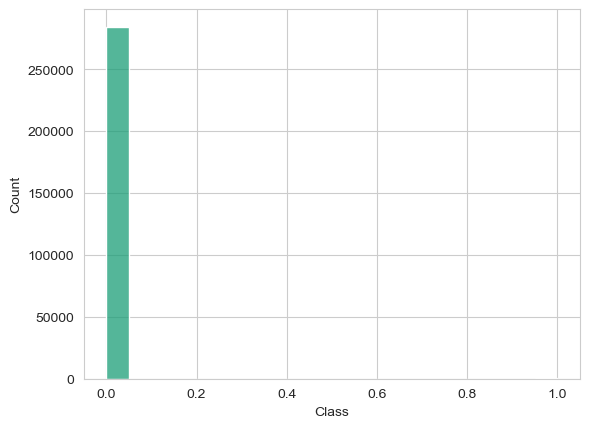

In [55]:
sns.histplot(x=df['Class'])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# Descriptive Statistics

### Class - Fraudant

In [58]:
classdist = df.groupby('Class')['Time'].count()
print(f" The count non-Fraudent and Fraudent is {classdist.tolist()}")
classdist_percentage = (classdist / classdist.sum()) * 100
print(f" The Percentage difference between non-Fraudent and Fraudent is {classdist_percentage.tolist()}")

 The count non-Fraudent and Fraudent is [284315, 492]
 The Percentage difference between non-Fraudent and Fraudent is [99.82725143693798, 0.1727485630620034]


so it's less than 1 percent who is fraudent! 

#### Note: Have to Apply SMOTE while training

### Amount 

In [61]:
# Removing Outliers to remove effect of it on average
q3 = df['Amount'].quantile(0.75)
q1 = df['Amount'].quantile(0.25)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

Amount_wh_outliers = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]


In [62]:
skewness = Amount_wh_outliers['Amount'].skew()
print(f"Skewness of 'Amount': {skewness}")

Skewness of 'Amount': 1.5750079526382468


since it's greater 0 so it means postive skewed so we have to use median instead of
mean to average amount

In [64]:
print(F"the average amount is {Amount_wh_outliers['Amount'].median()}")
print(F"what if i don't remove outliers, the average amount will be {df['Amount']}")

the average amount is 16.0
what if i don't remove outliers, the average amount will be 0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64


### TIME

In [66]:
dff = df.copy()
dff['RollingMean'] = dff['Time'].rolling(window=5).mean()
dff['RollingMeanChange'] = dff['RollingMean'].diff()
average_change_per_row = dff['RollingMeanChange'].abs().mean()
print(f"Average change in Time is {average_change_per_row}")

Average change in Time is 0.6066930709756253


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# Trend Analysis

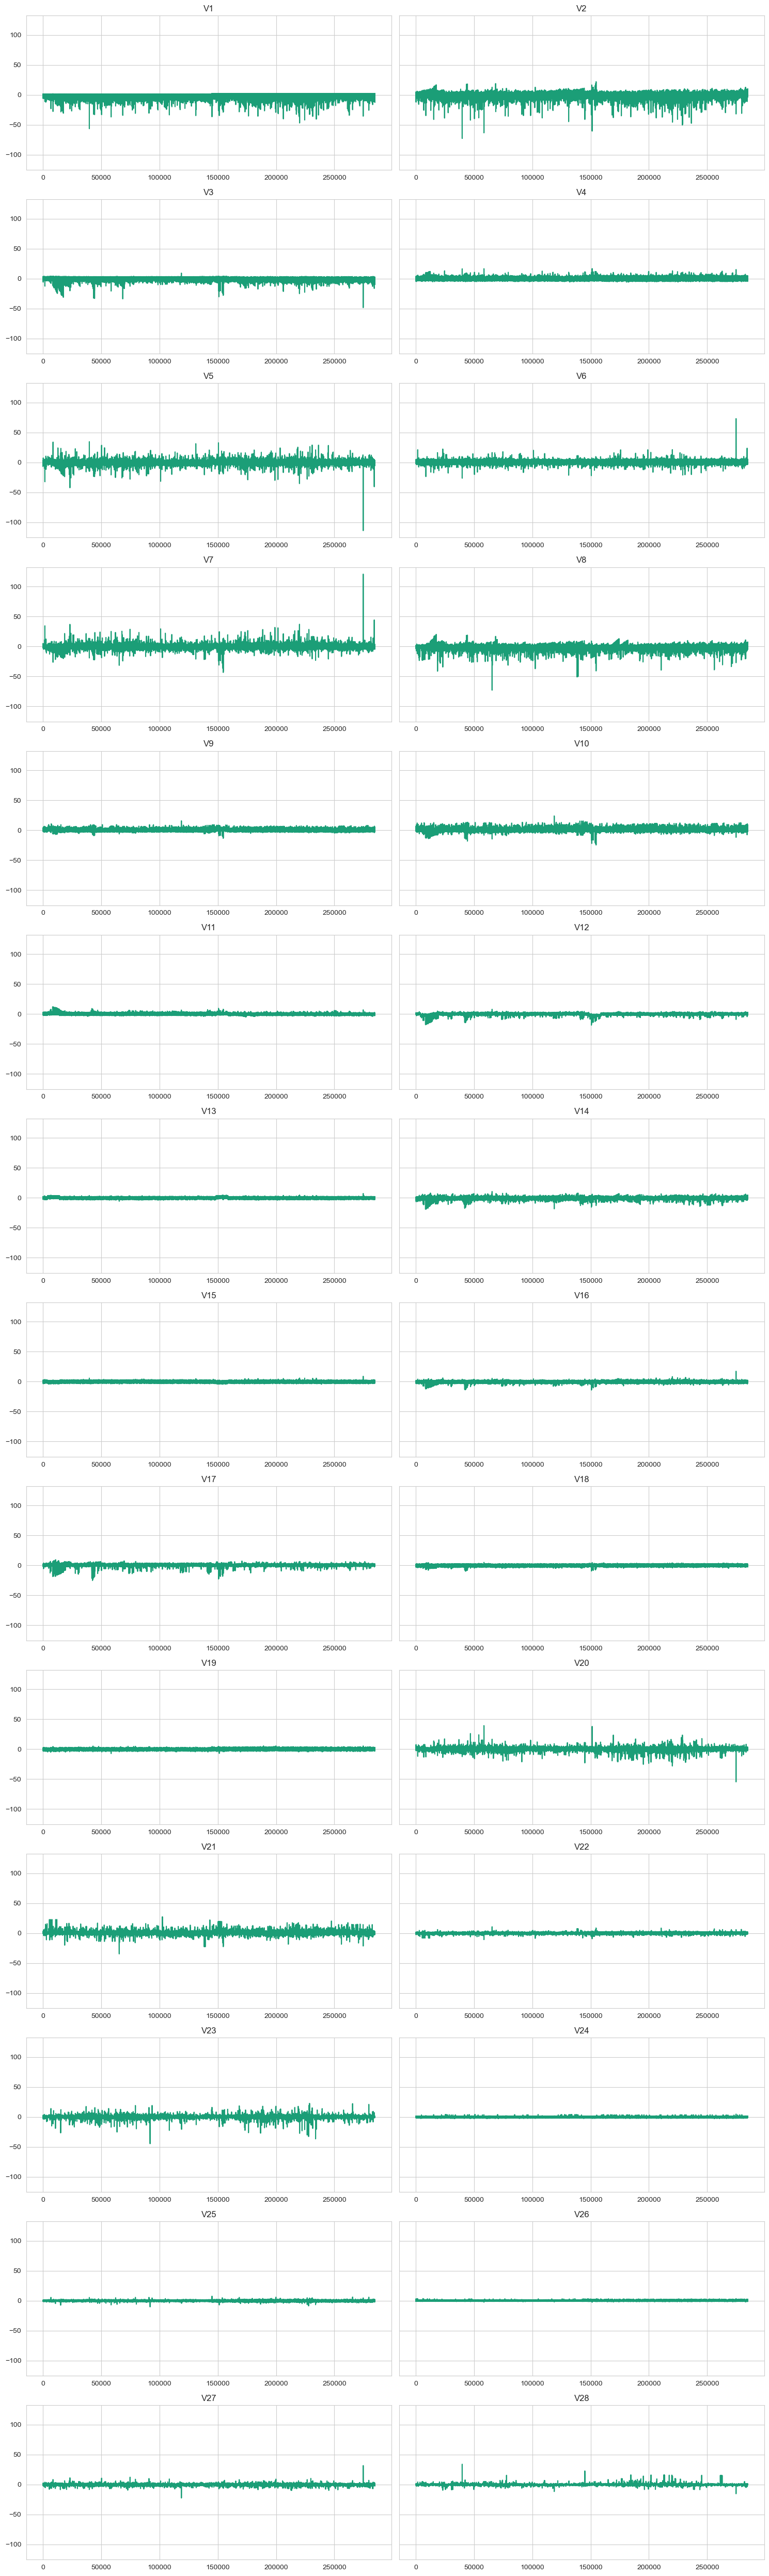

In [157]:
v_cols = [f'V{i}' for i in range(1, 29)]
fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(15, 50), sharey=True)
axes = axes.flatten()
for i, col in enumerate(v_cols):
    df[col].plot(ax=axes[i])
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()

#### all Vs ranges from -50 to 50

<Axes: >

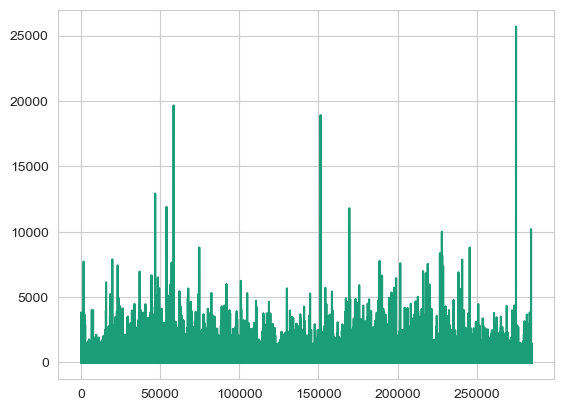

In [163]:
df['Amount'].plot()

### Fraudent - Distribution

In [166]:
fraudent_df = df[df['Class'] == 1]
fraudent_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


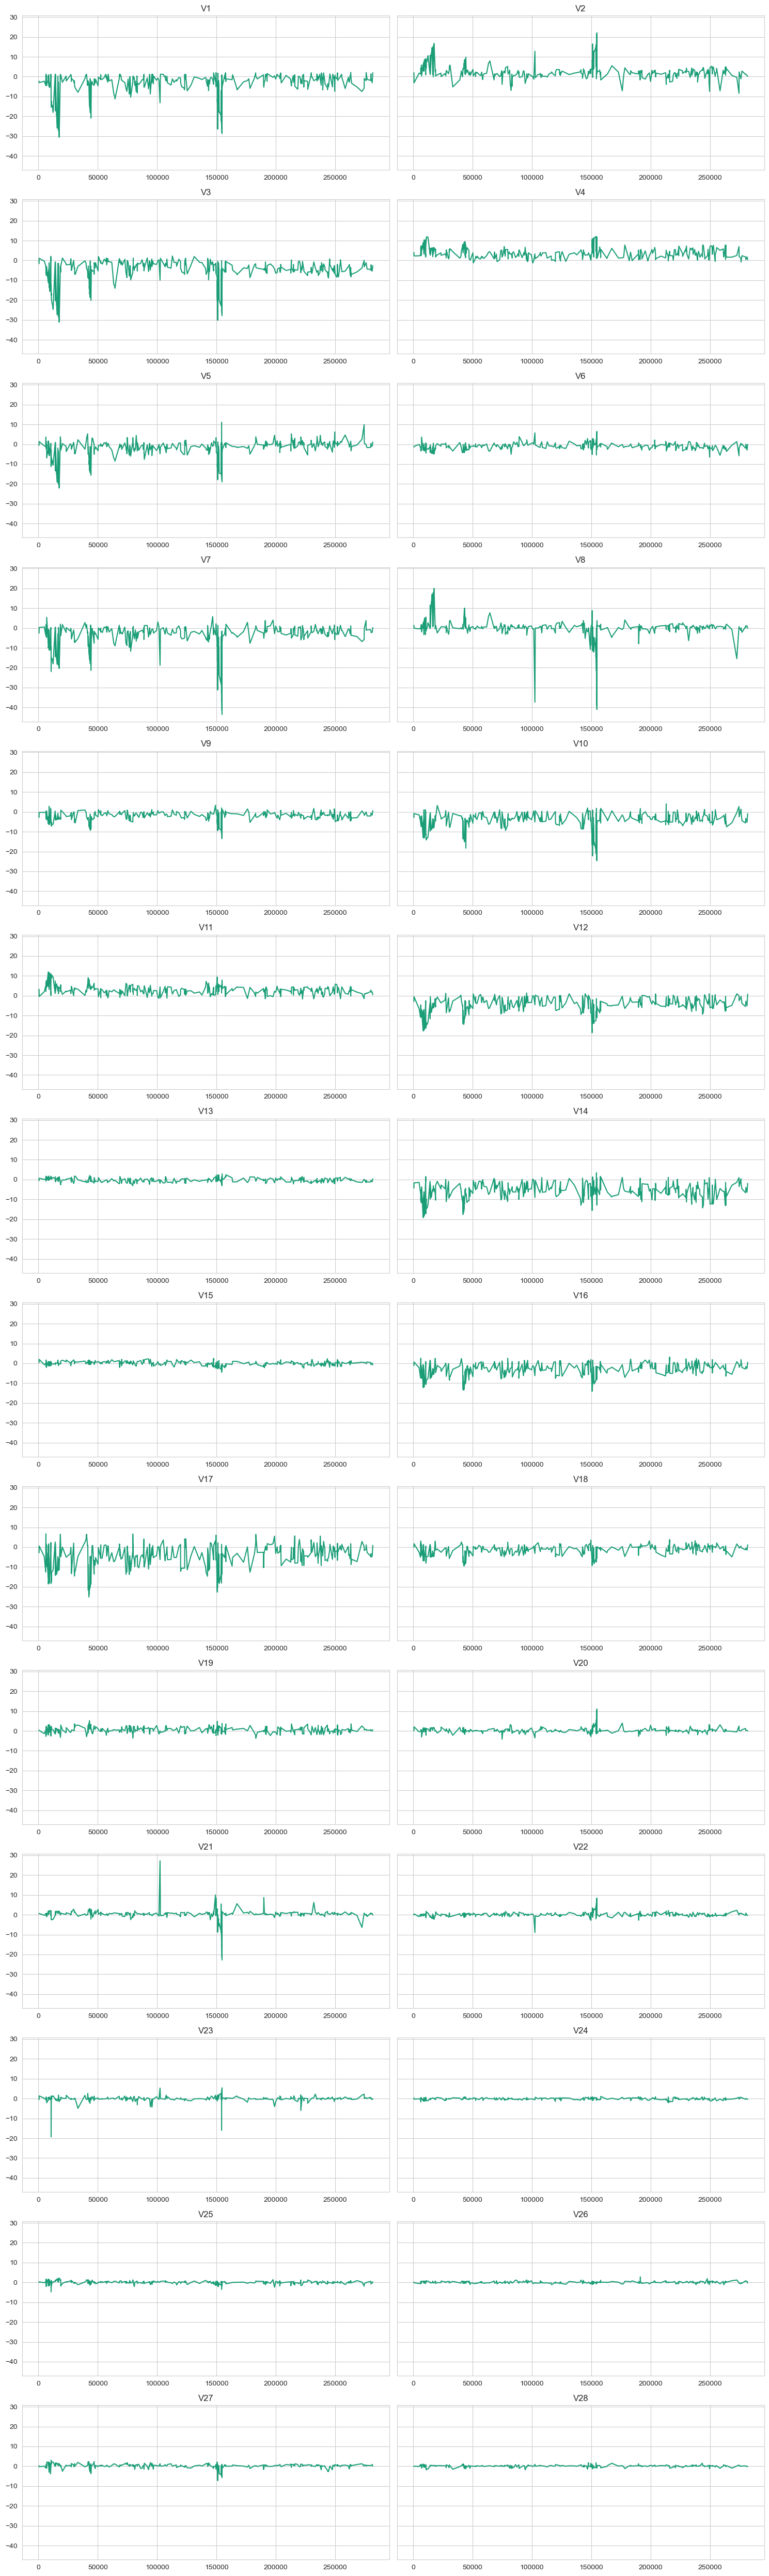

In [173]:
v_cols = [f'V{i}' for i in range(1, 29)]
fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(15, 50), sharey=True)
axes = axes.flatten()
for i, col in enumerate(v_cols):
    fraudent_df[col].plot(ax=axes[i], x=fraudent_df['Time'])
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()

In [193]:
variation_data = []

for i, col in enumerate(v_cols):
    total_std = df[col].std()
    fraud_std = fraudent_df[col].std()
    variation_data.append({
        "Column": col,
        "Total Std Dev": total_std,
        "Fraud Std Dev": fraud_std
    })

variation_df = pd.DataFrame(variation_data)
variation_df['difference'] =  variation_df['Fraud Std Dev'] - variation_df['Total Std Dev']
print(variation_df)


   Column  Total Std Dev  Fraud Std Dev  difference
0      V1       1.958696       6.783687    4.824991
1      V2       1.651309       4.291216    2.639907
2      V3       1.516255       7.110937    5.594682
3      V4       1.415869       2.873318    1.457449
4      V5       1.380247       5.372468    3.992221
5      V6       1.332271       1.858124    0.525852
6      V7       1.237094       7.206773    5.969679
7      V8       1.194353       6.797831    5.603478
8      V9       1.098632       2.500896    1.402263
9     V10       1.088850       4.897341    3.808491
10    V11       1.020713       2.678605    1.657891
11    V12       0.999201       4.654458    3.655257
12    V13       0.995274       1.104518    0.109244
13    V14       0.958596       4.278940    3.320344
14    V15       0.915316       1.049915    0.134599
15    V16       0.876253       3.865035    2.988782
16    V17       0.849337       6.970618    6.121281
17    V18       0.838176       2.899366    2.061190
18    V19   

so there is unusaul pattern in fraudents, more variations

due to privacy it is not ceeared but it shows more transactions, atm check, online card payments this shows fraudent

<Axes: >

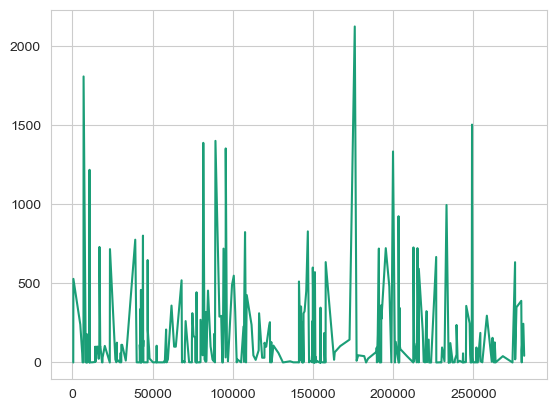

In [171]:
fraudent_df['Amount'].plot()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# Correlation

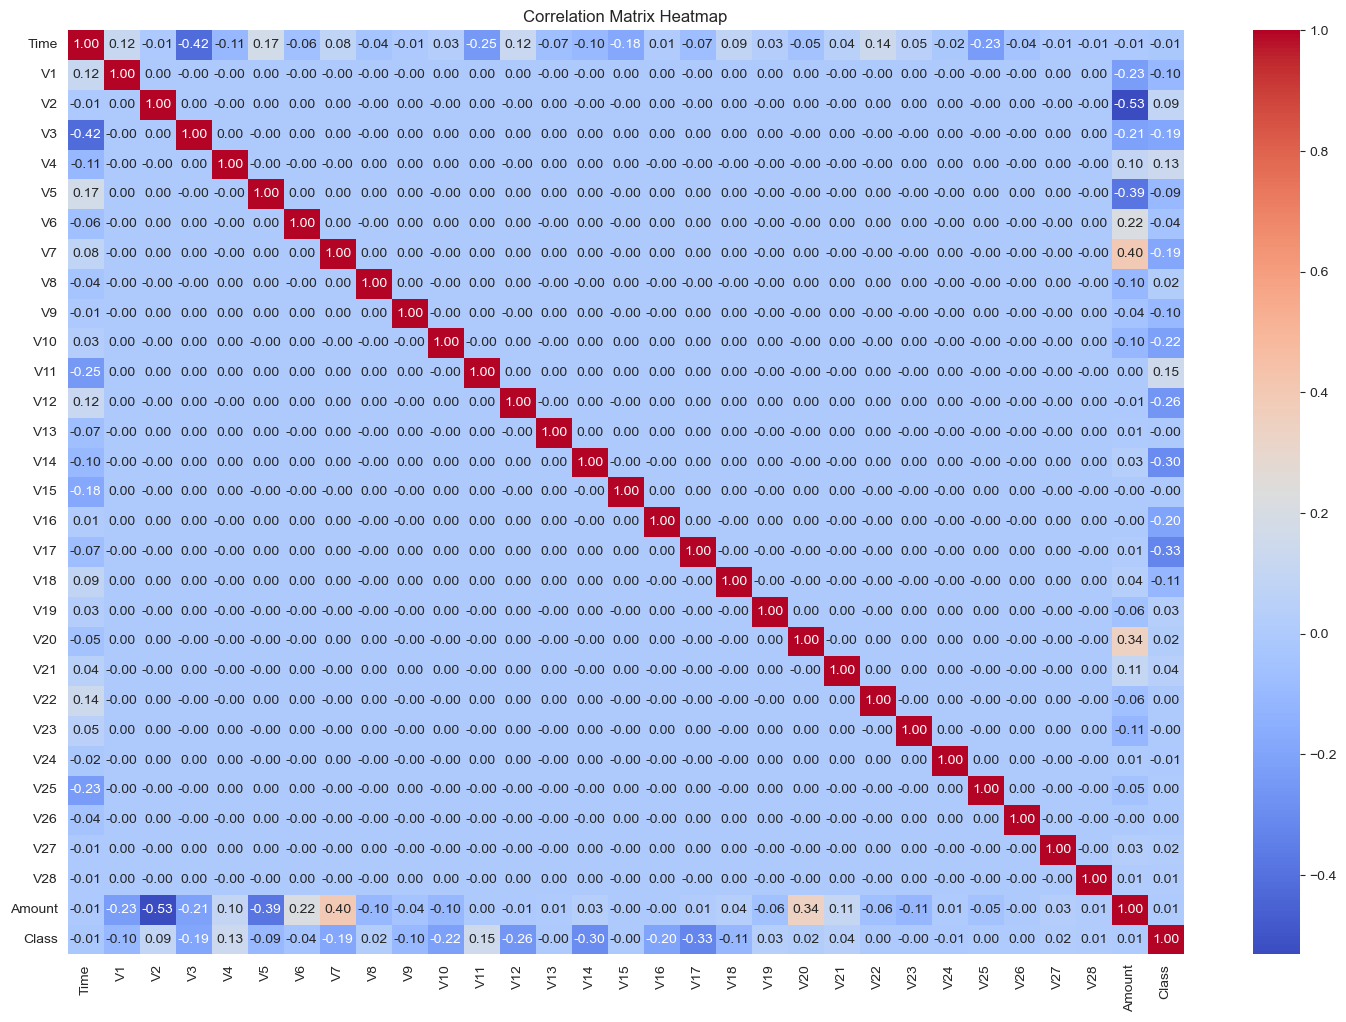

In [210]:
corr_matrix = df.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

📊 Challenges in Visualizing Correlation with the Target Variable Visualizing correlations
between the target variable (Class) and other features in the dataset presents two
primary challenges:
> Severe Class Imbalance: The dataset exhibits a significant class imbalance, with
approximately 99% of the instances belonging to the non-fraudulent class and only 1%
to the fraudulent class. This disparity can obscure meaningf
ul patterns and affect the
performance of traditional machine learning models.

> Non-Linear Relationships: The relationship between the features and the target variable
is not linear. Standard linear correlation measures may fail to capture these complex
associations, leading to misleading interpretations.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# Model Applying and Comparison

In [17]:
X = df.drop('Class', axis=1)
Y = df['Class']

In [19]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [21]:
 Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train1, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train1)

from collections import Counter
print("Before SMOTE:", Counter(Y_train1))
print("After SMOTE:", Counter(Y_train))


Before SMOTE: Counter({0: 227451, 1: 394})
After SMOTE: Counter({0: 227451, 1: 227451})


### Started with Random Forest Classifier
because less computative cost and easily fit!

In [124]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42,verbose=1, n_jobs=1)
model.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.1min finished


RandomForestClassifier(n_jobs=1, random_state=42, verbose=1)

In [125]:
from sklearn.metrics import accuracy_score, classification_report
Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n" ,classification_report(Y_test, Y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.9995259997893332
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


### Gradient Bossting to see how it works

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, Y_train)
rf_probs = model.predict_proba(X_test)[:, 1]
gb_probs = gb_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(Y_test, rf_probs)
gb_auc = roc_auc_score(Y_test, gb_probs)
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"Gradient Boosting AUC: {gb_auc:.4f}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Random Forest AUC: 0.9849
Gradient Boosting AUC: 0.9844


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


### Functional API of keras, 
since it can capture complex relations

In [37]:
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import datetime
import os

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


inputs = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
dl_model = Model(inputs=inputs, outputs=outputs)
dl_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['AUC'])

# TensorBoard setup
log_dir = os.path.join("logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=2, write_graph=True)

# Training
dl_model.fit(
    X_train_scaled, Y_train,
    epochs=25, 
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[tensorboard_callback]
)


Epoch 1/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 9s 712us/step - AUC: 0.9951 - loss: 0.0633 - val_AUC: 0.0000e+00 - val_loss: 0.0139
Epoch 2/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 8s 691us/step - AUC: 0.9996 - loss: 0.0147 - val_AUC: 0.0000e+00 - val_loss: 0.0066
Epoch 3/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 8s 692us/step - AUC: 0.9997 - loss: 0.0110 - val_AUC: 0.0000e+00 - val_loss: 0.0015
Epoch 4/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 8s 711us/step - AUC: 0.9997 - loss: 0.0092 - val_AUC: 0.0000e+00 - val_loss: 0.0102
Epoch 5/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 9s 750us/step - AUC: 0.9998 - loss: 0.0085 - val_AUC: 0.0000e+00 - val_loss: 0.0020
Epoch 6/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 8s 724us/step - AUC: 0.9998 - loss: 0.0069 - val_AUC: 0.0000e+00 - val_loss: 0.0012
Epoch 7/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 8s 728us/step - AUC: 0.9998 - loss: 0.0067 - val_AUC: 0.0000e+00 - val_loss: 0.0036
Epoch 8/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 8s 727us/step - AUC: 0.9999 - loss: 0.0064 - val_AUC: 0.0000

In [39]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 42960), started 2:18:09 ago. (Use '!kill 42960' to kill it.)

In [132]:
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"Deep Learning (Functional API) AUC: {dl_auc:.4f}")

Random Forest AUC: 0.9849
Deep Learning (Functional API) AUC: 0.9734


In [133]:
from sklearn.metrics import accuracy_score, classification_report
Y_pred = dl_model.predict(X_test)
Y_pred_class = (Y_pred >= 0.5).astype(int)
accuracy = accuracy_score(Y_test, Y_pred_class)
print("Accuracy:", accuracy)
report = classification_report(Y_test, Y_pred_class)
print("Classification Report:\n"
, report)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
Accuracy: 0.9977528878901724
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# Deployement

In [135]:
testdf = pd.read_csv('test.csv')

In [136]:
predictions = dl_model.predict(testdf)
testdf['Predictions'] = predictions

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step


In [137]:
checking = testdf.groupby('Predictions')['Time'].count()
checking

Predictions
0.0    449
1.0     51
Name: Time, dtype: int64

In [202]:
testdf_F = testdf[testdf['Predictions'] == 1]
testdf_F.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Predictions
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,14277.339140,43.278081,34.504639,28.804562,24.269724,19.937705,17.765697,31.056154,20.504718,28.366795,...,25.911287,14.517704,26.399507,14.315983,30.901169,32.468687,8.246205,7.527820,17590.235189,1.0
std,8876.906755,51.080969,62.192787,57.210912,49.287418,55.242408,57.484917,58.855918,56.682088,54.184261,...,62.746061,54.286568,56.661114,56.366061,48.092390,53.933567,52.077826,54.987730,6416.122432,0.0
min,853.589186,-67.699390,-67.595013,-69.953842,-68.091074,-65.794454,-69.148478,-68.279709,-69.644179,-64.305018,...,-68.413550,-67.842807,-68.271346,-68.988404,-56.679453,-68.602012,-69.728615,-69.719974,2341.423961,1.0
25%,6918.328914,11.585473,-17.854826,-22.609622,-13.420239,-22.159383,-24.122210,-26.257617,-28.423640,-19.220380,...,-25.656493,-25.853133,-21.378609,-38.071256,-3.943840,-7.286807,-28.734162,-37.717073,14285.676710,1.0
50%,14078.037730,54.438810,39.354406,34.283146,18.669800,12.536631,4.755149,48.045565,22.203336,32.986336,...,13.893985,5.177284,32.923914,19.065913,37.315641,42.048517,-3.029666,-0.744817,19093.495380,1.0
75%,20063.739685,86.145422,88.693485,77.012996,65.739820,78.551294,66.210935,83.873583,62.853154,71.232791,...,90.788906,52.219204,68.362039,67.940188,69.687978,75.927024,37.952463,34.587979,22469.596585,1.0
max,33548.032750,116.209869,119.242429,114.942698,111.429045,111.573785,117.252691,117.461520,117.032449,115.315195,...,119.003201,115.414399,116.201038,116.759907,117.491353,111.794787,117.949240,116.671690,25457.819390,1.0


<div class='alert alert-block alert-success'>
    <b>Success</b>: This box indicates a successful action.


In [140]:
input_values = {
'Time': float(input("Enter Time: ")),
'V1': float(input("Enter V1: ")),
'V2': float(input("Enter V2: ")),
'V3': float(input("Enter V3: ")),
'V4': float(input("Enter V4: ")),
'V5': float(input("Enter V5: ")),
'V6': float(input("Enter V6: ")),
'V7': float(input("Enter V7: ")),
'V8': float(input("Enter V8: ")),
'V9': float(input("Enter V9: ")),
'V10': float(input("Enter V10: ")),
'V11': float(input("Enter V11: ")),
'V12': float(input("Enter V12: ")),
'V13': float(input("Enter V13: ")),
'V14': float(input("Enter V14: ")),
'V15': float(input("Enter V15: ")),
'V16': float(input("Enter V16: ")),
'V17': float(input("Enter V17: ")),
'V18': float(input("Enter V18: ")),
'V19': float(input("Enter V19: ")),
'V20': float(input("Enter V20: ")),
'V21': float(input("Enter V21: ")),
'V22': float(input("Enter V22: ")),
'V23': float(input("Enter V23: ")),
'V24': float(input("Enter V24: ")),
'V25': float(input("Enter V25: ")),
'V26': float(input("Enter V26: ")),
'V27': float(input("Enter V27: ")),
'V28': float(input("Enter V28: ")),
'Amount': float(input("Enter Amount: "))
}
input_df = pd.DataFrame([input_values])
scaled_input = scaler.transform(input_df)
prediction = model.predict(scaled_input)
print("Prediction:", "Fraudulent (1)" if prediction[0] == 1 else "Legitimate (0)")

Enter Time:  462
Enter V1:  1
Enter V2:  1
Enter V3:  1
Enter V4:  1
Enter V5:  1
Enter V6:  1
Enter V7:  1
Enter V8:  1
Enter V9:  1
Enter V10:  1
Enter V11:  1
Enter V12:  1
Enter V13:  1
Enter V14:  1
Enter V15:  1
Enter V16:  1
Enter V17:  1
Enter V18:  1
Enter V19:  1
Enter V20:  1
Enter V21:  1
Enter V22:  1
Enter V23:  1
Enter V24:  1
Enter V25:  1
Enter V26:  1
Enter V27:  1
Enter V28:  1
Enter Amount:  1


Prediction: Legitimate (0)


/Users/ahadmoeen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [212]:

dl_model.save("dl_model.h5")